In [163]:
import numpy as np
import xarray as xr 
from scipy import linalg as LA
import matplotlib.pyplot as plt 

# Set global matplotlib style parameters
plt.rcParams.update({'font.size': 10, 
                     'text.usetex': True, 
                     'animation.html': 'jshtml', 
                     'figure.facecolor': 'w'})

In [152]:
src_fp = 'glc1-a/nc/glc1-a_dx_50_NT_1000_dt_1.0_MB_-1.225_OFF_Tma_-9.0_wlimit_*_prog_gridded.nc'
src_ds = xr.open_mfdataset(src_fp)

src_ds['Vol'] = src_ds.height.isel(coord_2=-1).integrate("coord_1") /\
                src_ds.height.isel(coord_2=-1,t=0).integrate("coord_1")

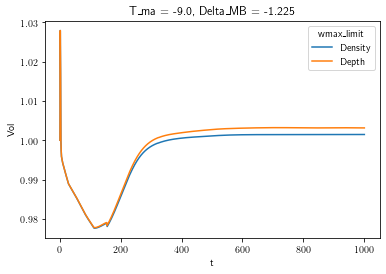

In [153]:
src_ds['Vol'].plot(hue='wmax_limit')

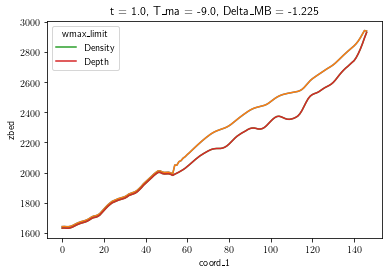

In [155]:
src_ds.Z.isel(coord_2=-1, t=-1).plot(hue='wmax_limit')
src_ds.zbed.isel(coord_2=-1, t=0).plot(hue='wmax_limit')

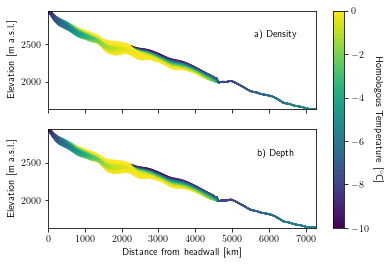

In [202]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True) 


norm = plt.Normalize(-10, 0.0)

im = ax[0].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['temperature'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Density'),
                      shading='gouraud',
                      norm=norm
                     )
ax[0].annotate('a) Density', xy=(0.85,0.75), xycoords='axes fraction', ha='center', va='center')

im = ax[1].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['temperature'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Depth'),
                      shading='gouraud',
                      norm=norm
                     )

ax[1].annotate('b) Depth', xy=(0.85,0.75), xycoords='axes fraction', ha='center', va='center')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Homologous Temperature [$^\circ$C]', rotation=270, labelpad=15)



ax[0].set_ylabel('Elevation [m a.s.l.]')
ax[1].set_ylabel('Elevation [m a.s.l.]')
ax[1].set_xlabel('Distance from headwall [km]')


plt.savefig('figs/Temperature.pdf', facecolor='w', bbox_inches='tight')

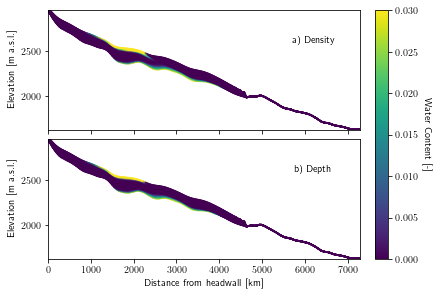

In [203]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, 
                       figsize=(6, 4),
                       constrained_layout=True) 

norm = plt.Normalize(0.0,0.03)

im = ax[0].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['water content'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Density'),
                      shading='gouraud',
                      norm=norm
                     )
ax[0].annotate('a) Density', xy=(0.85,0.75), xycoords='axes fraction', ha='center', va='center')

im = ax[1].pcolormesh(src_ds.X[:, ::-1], 
                      src_ds.Z.isel(t=-1, wmax_limit=0), 
                      src_ds['water content'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Depth'),
                      shading='gouraud',
                      norm=norm
                     )

ax[1].annotate('b) Depth', xy=(0.85,0.75), xycoords='axes fraction', ha='center', va='center')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Water Content [-]', rotation=270, labelpad=15)



ax[0].set_ylabel('Elevation [m a.s.l.]')
ax[1].set_ylabel('Elevation [m a.s.l.]')
ax[1].set_xlabel('Distance from headwall [km]')


plt.savefig('figs/WaterContent.pdf', facecolor='w', bbox_inches='tight')

In [ ]:
plt.annotate

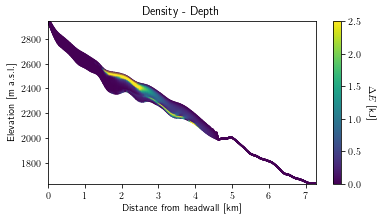

In [186]:
fig, ax = plt.subplots(1,1, figsize=(6,3)) 

norm = plt.Normalize(0.0,2.5)

im = ax.pcolormesh(src_ds.X[:, ::-1]/1e3, 
                   src_ds.Z.isel(t=-1, wmax_limit=0), 
                  (src_ds['enthalpy_h'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Density') - \
                   src_ds['enthalpy_h'].isel(Delta_MB=0, T_ma=0, t=-1).sel(wmax_limit='Depth'))/1e3,
                   shading='gouraud', 
                   norm=norm
                     )

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('$\Delta E$ [kJ]', rotation=270, labelpad=15)

ax.set_ylabel('Elevation [m a.s.l.]')
ax.set_xlabel('Distance from headwall [km]')

ax.set_title('Density - Depth')

plt.savefig('figs/Enthalpy_Diff_kJ.pdf', facecolor='w', bbox_inches='tight')

In [165]:
LA.norm(src_ds['enthalpy_h'].sel(wmax_limit='Density') - \
        src_ds['enthalpy_h'].sel(wmax_limit='Depth'))

2386585.1893402087

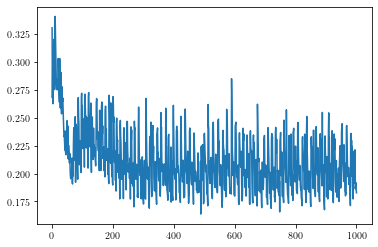

In [185]:
plt.plot(src_ds.t, 
LA.norm(src_ds['water content'].isel(Delta_MB=0, T_ma=0).sel(wmax_limit='Density') - \
        src_ds['water content'].isel(Delta_MB=0, T_ma=0).sel(wmax_limit='Depth'), axis=(1,2)))